#Web Scrapping Project
Performing the Data Scraping from the Website which contain information of fifa players with the help of BeautifulSoup, Regex and python.

Website Link: https://www.fifaindex.com/

# Steps

1. Scrape the Data
2. Data Cleaning
3. Convert the data into a DataFrame
4. Perform Data Analysis (EDA -> Exploratory Data Analysis) -> DC, DE, DV, DM

#Performing the Data scrapping.

# Importing the libraries

In [ ]:
# For performing mathematical operations
import numpy as np

# For data analysis tool
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt

# For data visualization
import seaborn as sns

# For data cleaning
import re

# For getting data from the website
import requests

# For web scraping
from bs4 import BeautifulSoup

Checking for the request.

In [ ]:
 url = "https://www.fifaindex.com/?page=1"
 req = requests.get(url)
 req.status_code

200

In [ ]:
for i in range(1,5):
  req = requests.get(f"https://www.fifaindex.com/?page={i}")
  print(req.status_code)

200
200
200
200


To get these information from the website.

In [ ]:
columns = ["IMAGE_LINK", 'NAME', 'AGE', 'OVR', 'POT', 'TEAM', 'POSITION', 'NATIONALITY']

Q. Write a logic to print the URL of all 4 pages

In [ ]:
for i in range(1,5):
  url = f"https://www.fifaindex.com/?page={i}"
  print(url)

https://www.fifaindex.com/?page=1
https://www.fifaindex.com/?page=2
https://www.fifaindex.com/?page=3
https://www.fifaindex.com/?page=4


In [ ]:
req = requests.get("https://www.fifaindex.com/?page=1")

Getting the website content.

In [ ]:
soup = BeautifulSoup(req.content)


In [ ]:
soup.prettify()

'<!DOCTYPE html>\n<html lang="en">\n <head>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width, initial-scale=1" name="viewport"/>\n  <link href="/favicon.ico" rel="icon"/>\n  <link href="/ar/" hreflang="ar" rel="alternate"/>\n  <link href="/cs/" hreflang="cs" rel="alternate"/>\n  <link href="/da/" hreflang="da" rel="alternate"/>\n  <link href="/de/" hreflang="de" rel="alternate"/>\n  <link href="/" hreflang="en" rel="alternate"/>\n  <link href="/es/" hreflang="es" rel="alternate"/>\n  <link href="/es-mx/" hreflang="es-mx" rel="alternate"/>\n  <link href="/fr/" hreflang="fr" rel="alternate"/>\n  <link href="/it/" hreflang="it" rel="alternate"/>\n  <link href="/ja/" hreflang="ja" rel="alternate"/>\n  <link href="/hu/" hreflang="hu" rel="alternate"/>\n  <link href="/nl/" hreflang="nl" rel="alternate"/>\n  <link href="/no/" hreflang="no" rel="alternate"/>\n  <link href="/pl/" hreflang="pl" rel="alternate"/>\n  <link hr

In [ ]:
arr = [i for i in soup.findAll('tr')]

In [ ]:
arr

[<tr>
 <th class="photo"></th>
 <th class="flag"></th>
 <th class="ratings"><a href="/players/?page=1&amp;order_by=overallrating&amp;order=0">OVR</a><span style="color:transparent;'">-</span><a href="/players/?page=1&amp;order_by=potential&amp;order=0">POT</a></th>
 <th class="name">Name</th>
 <th class="positions">Preferred Positions</th>
 <th class="age"><a href="/players/?page=1&amp;order_by=age&amp;order=0">Age</a></th>
 <th class="logo"></th>
 </tr>,
 <tr data-playerid="255434"><td><figure class="player"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a></figure></td><td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.

In [ ]:
del arr[0]

In [ ]:
arr

[<tr data-playerid="255434"><td><figure class="player"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a></figure></td><td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.png"/></a></td><td data-title="OVR / POT"><span class="badge badge-dark rating r4">64</span><span class="badge badge-dark rating r2">83</span></td><td data-title="Name"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23">Julio César Enciso</a></td><td class="nowrap" data-title="Preferred Positions"><a class="link-position" href="/players/?position=12" title="RM"><span class="badge badge-dark position rm"

In [ ]:
arr[0]

<tr data-playerid="255434"><td><figure class="player"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a></figure></td><td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.png"/></a></td><td data-title="OVR / POT"><span class="badge badge-dark rating r4">64</span><span class="badge badge-dark rating r2">83</span></td><td data-title="Name"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23">Julio César Enciso</a></td><td class="nowrap" data-title="Preferred Positions"><a class="link-position" href="/players/?position=12" title="RM"><span class="badge badge-dark position rm">

In [ ]:
len(arr)

30

In [ ]:
# Image link
Image_link = re.sub('.*5" loading="lazy" src="|"/.*>'," ",str(arr[0]))
Image_link

' https://fifastatic.fifaindex.com/FIFA23/players/255434.png '

In [ ]:
# Name
name = re.sub('.*d FIFA 23">|<.*>','',str(arr[0]))
name

''

In [ ]:
# Age
age = re.sub('.*Age">|<.*>','',str(arr[0]))
age

'19'

In [ ]:
# OVR
ovr = re.sub('.*r4">|<.*>',"",str(arr[0]))
ovr

'64'

In [ ]:
# POT
pot = re.sub('.*r2">|<.*>',"",str(arr[0]))
pot

'83'

In [ ]:
# Team name
team = re.sub('.*title="| F.*>',"",str(arr[0]))
team

'Brighton'

Properly extracting the data with the helps of tags.

In [ ]:
str(arr[0].findAll('a',{'class':"link-player"}))

'[<a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a>, <a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23">Julio César Enciso</a>]'

In [ ]:
# Name
name = re.sub('.*23">|<.*',"",str(arr[0].findAll('a',{'class':"link-player"})))
name

'Julio César Enciso'

In [ ]:
# Team logo link
team_logo = re.sub('^<tr.*src="|".*>','',str(arr[0]))
team_logo

'https://fifastatic.fifaindex.com/FIFA23/teams/light/1808.png'

In [ ]:
str(arr[0].find('img',{'class':'player size-5'}))

'<img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/>'

In [ ]:
# Proper image link
re.sub('.*src="|"/>',"",str(arr[0].find('img',{'class':'player size-5'})))

'https://fifastatic.fifaindex.com/FIFA23/players/255434.png'

In [ ]:
# Proper OVR
ovr = int(re.sub('.*">|<.*>',"",str(arr[0].find('span',{'class':'badge badge-dark rating r4'}))))
ovr

64

In [ ]:
# Proper POT
pot = int(re.sub('.*">|<.*>',"",str(arr[0].find('span',{'class':'badge badge-dark rating r2'}))))
pot

83

In [ ]:
# Team name
team_name = re.sub('.*title="| F.*',"",str(arr[0].find('a',{'class':'link-team'})))
team_name

'Brighton'

In [ ]:
# Preferred location
pl = re.sub('.*">|<.*>',"",str(arr[0].find('span',{'class':'badge badge-dark position st'})))
pl

'None'

In [ ]:
# Nationality
nationality = re.sub('.*title="|".*>',"",str(arr[0].find('a',{'class':'link-nation'})))
nationality

'Paraguay'

#Creating the Data Frame

In [ ]:
arr[0]

<tr data-playerid="255434"><td><figure class="player"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a></figure></td><td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.png"/></a></td><td data-title="OVR / POT"><span class="badge badge-dark rating r4">64</span><span class="badge badge-dark rating r2">83</span></td><td data-title="Name"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23">Julio César Enciso</a></td><td class="nowrap" data-title="Preferred Positions"><a class="link-position" href="/players/?position=12" title="RM"><span class="badge badge-dark position rm">

In [ ]:
len(arr)

30

In [ ]:
# Columns for the dataframe creation
columns = ['Name','Age','POT','Team','Nationality']

In [ ]:
for i in range(0,len(arr)):
   print(f'l_{i} = list(arr{[i]})')

l_0 = list(arr[0])
l_1 = list(arr[1])
l_2 = list(arr[2])
l_3 = list(arr[3])
l_4 = list(arr[4])
l_5 = list(arr[5])
l_6 = list(arr[6])
l_7 = list(arr[7])
l_8 = list(arr[8])
l_9 = list(arr[9])
l_10 = list(arr[10])
l_11 = list(arr[11])
l_12 = list(arr[12])
l_13 = list(arr[13])
l_14 = list(arr[14])
l_15 = list(arr[15])
l_16 = list(arr[16])
l_17 = list(arr[17])
l_18 = list(arr[18])
l_19 = list(arr[19])
l_20 = list(arr[20])
l_21 = list(arr[21])
l_22 = list(arr[22])
l_23 = list(arr[23])
l_24 = list(arr[24])
l_25 = list(arr[25])
l_26 = list(arr[26])
l_27 = list(arr[27])
l_28 = list(arr[28])
l_29 = list(arr[29])


In [ ]:
l_0 = list(arr[0])
l_1 = list(arr[1])
l_2 = list(arr[2])
l_3 = list(arr[3])
l_4 = list(arr[4])
l_5 = list(arr[5])
l_6 = list(arr[6])
l_7 = list(arr[7])
l_8 = list(arr[8])
l_9 = list(arr[9])
l_10 = list(arr[10])
l_11 = list(arr[11])
l_12 = list(arr[12])
l_13 = list(arr[13])
l_14 = list(arr[14])
l_15 = list(arr[15])
l_16 = list(arr[16])
l_17 = list(arr[17])
l_18 = list(arr[18])
l_19 = list(arr[19])
l_20 = list(arr[20])
l_21 = list(arr[21])
l_22 = list(arr[22])
l_23 = list(arr[23])
l_24 = list(arr[24])
l_25 = list(arr[25])
l_26 = list(arr[26])
l_27 = list(arr[27])
l_28 = list(arr[28])
l_29 = list(arr[29])

In [ ]:
li = []
[li.extend(l) for l in (l_0, l_1, l_2, l_3, l_4, l_5, l_6, l_7, l_8, l_9, l_10, l_11, l_12, l_13, l_14, l_15, l_16, l_17,l_18, l_19, l_20, l_21, l_22, l_23, l_24, l_25, l_26, l_27, l_28, l_29)]



[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
li

[<td><figure class="player"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a></figure></td>,
 <td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.png"/></a></td>,
 <td data-title="OVR / POT"><span class="badge badge-dark rating r4">64</span><span class="badge badge-dark rating r2">83</span></td>,
 <td data-title="Name"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23">Julio César Enciso</a></td>,
 <td class="nowrap" data-title="Preferred Positions"><a class="link-position" href="/players/?position=12" title="RM"><span class="badge badge-dark position rm">RM</span></a><

# Finding the regex pattern that can work on the data collected from website and gives us the only desired information.

In [ ]:
li[5]

<td data-title="Age">19</td>

In [ ]:
re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[5]))

'19'

In [ ]:
li[2]

<td data-title="OVR / POT"><span class="badge badge-dark rating r4">64</span><span class="badge badge-dark rating r2">83</span></td>

In [ ]:
re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[2]))

'83'

In [ ]:
li[6]

<td data-title="Team"><a class="link-team" href="/team/1808/brighton/" title="Brighton FIFA 23"><img alt="Brighton FIFA 23" class="team size-3" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/teams/light/1808.png"/></a></td>

In [ ]:
re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[6]))

'Brighton'

In [ ]:
li[1]

<td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.png"/></a></td>

In [ ]:
re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[1]))

'Paraguay'

The universal regex pattern formed for the data we have  =  '.*">|.*alt="| FIFA.*>|<.*>|".*>'

In [ ]:
len(li)

210

In [ ]:
l_0

[<td><figure class="player"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23"><img alt="Julio César Enciso FIFA 23" class="player size-5" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA23/players/255434.png"/></a></figure></td>,
 <td data-title="Nationality"><a class="link-nation" href="/players/?nationality=58" title="Paraguay"><img alt="Paraguay" class="nation size-2" loading="lazy" src="https://fifastatic.fifaindex.com/FIFA21/images/flags/2/58.png"/></a></td>,
 <td data-title="OVR / POT"><span class="badge badge-dark rating r4">64</span><span class="badge badge-dark rating r2">83</span></td>,
 <td data-title="Name"><a class="link-player" href="/player/255434/julio-c%C3%A9sar-enciso/" title="Julio César Enciso FIFA 23">Julio César Enciso</a></td>,
 <td class="nowrap" data-title="Preferred Positions"><a class="link-position" href="/players/?position=12" title="RM"><span class="badge badge-dark position rm">RM</span></a><

In [ ]:
re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[3]))

'Julio César Enciso'

In [ ]:
# Creating the list

Nationality = [] #1
Pot = [] #2
Name = [] #3
Age = [] #5
Team = [] #6


In [ ]:
# Appending the values to Nationality list.

for i in range(0,len(arr)):
  list = re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[i*7+1]))
  Nationality.append(list)

# Appending the values to Pot list. 

for i in range(0,len(arr)):
  list = re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[i*7+2]))
  Pot.append(list)

# Appending the values to Name list.              

for i in range(0,len(arr)):
  list = re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[i*7+3]))
  Name.append(list)

# Appending the values to Age list.

for i in range(0,len(arr)):
  list = re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[i*7+5]))
  Age.append(list)

# Appending the values to Team list.

for i in range(0,len(arr)):
  list = re.sub('.*">|.*alt="| FIFA.*>|<.*>|".*>',"",str(li[i*7+6]))
  Team.append(list)  

In [ ]:
len(Nationality)

30

In [ ]:
# Creating the DataFrame
df = pd.DataFrame({"Name":Name,
                   "Nationality":Nationality,
                   "Age":Age,
                   "Team":Team,
                   "Pot":Pot,})

In [ ]:
df.head()

,Name,Nationality,Age,Team,Pot
0,Julio César Enciso,Paraguay,19,Brighton,83
1,Erling Haaland,Norway,22,Manchester City,94
2,Cristiano Ronaldo,Portugal,38,Al Nassr,88
3,Vinícius Jr.,Brazil,22,Real Madrid,92
4,Lionel Messi,Argentina,35,Paris SG,91


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         30 non-null     object
 1   Nationality  30 non-null     object
 2   Age          30 non-null     object
 3   Team         30 non-null     object
 4   Pot          30 non-null     object
dtypes: object(5)
memory usage: 1.3+ KB


In [ ]:
df.describe()

,Name,Nationality,Age,Team,Pot
count,30,30,30,30,30
unique,30,15,11,18,13
top,Julio César Enciso,Argentina,22,Brighton,88
freq,1,5,7,3,5


In [ ]:
df.Age = df.Age.astype(int)

In [ ]:
df.Pot = df.Pot.astype(int)

In [ ]:
df.describe()

,Age,Pot
count,30.000000,30.000000
mean,23.333333,87.833333
std,4.373378,3.504513
min,19.000000,80.000000
25%,21.000000,86.000000
50%,22.000000,88.000000
75%,24.000000,89.750000
max,38.000000,95.000000


In [ ]:
df.head()

,Name,Nationality,Age,Team,Pot
0,Julio César Enciso,Paraguay,19,Brighton,83
1,Erling Haaland,Norway,22,Manchester City,94
2,Cristiano Ronaldo,Portugal,38,Al Nassr,88
3,Vinícius Jr.,Brazil,22,Real Madrid,92
4,Lionel Messi,Argentina,35,Paris SG,91


In [ ]:
df.isna().sum()

Name           0
Nationality    0
Age            0
Team           0
Pot            0
dtype: int64

In [ ]:
df.Nationality.unique()

array(['Paraguay', 'Norway', 'Portugal', 'Brazil', 'Argentina', 'Georgia',
       'Netherlands', 'France', 'Croatia', 'Germany', 'Ukraine',
       'England', 'Japan', 'Spain', 'Nigeria'], dtype=object)

In [ ]:
df.Nationality.value_counts()

Argentina      5
France         4
England        3
Japan          3
Brazil         2
Netherlands    2
Germany        2
Spain          2
Paraguay       1
Norway         1
Portugal       1
Georgia        1
Croatia        1
Ukraine        1
Nigeria        1
Name: Nationality, dtype: int64

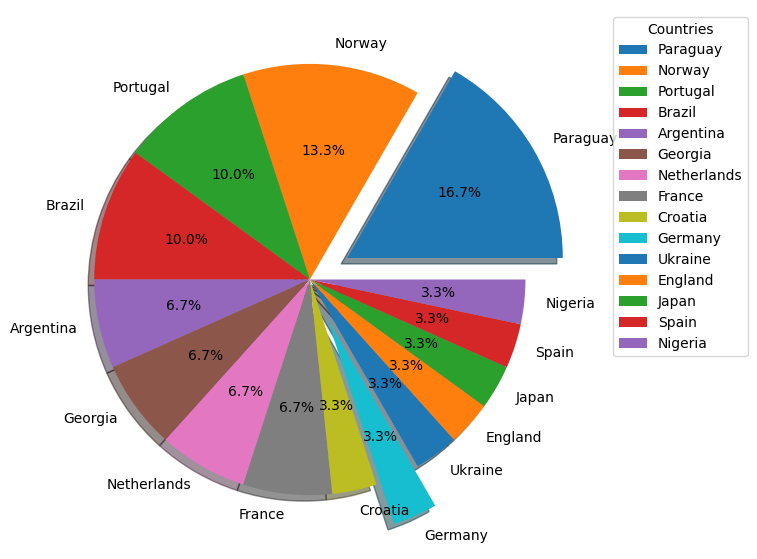

In [ ]:
plt.figure(figsize = (7,7))
explode = [0.2,0,0,0,0,0,0,0,0,0.2,0,0,0,0,0]
labels = ['Paraguay', 'Norway', 'Portugal', 'Brazil', 'Argentina', 'Georgia',
           'Netherlands', 'France', 'Croatia', 'Germany', 'Ukraine',
          'England', 'Japan', 'Spain', 'Nigeria']
plt.pie(df.Nationality.value_counts(),labels = labels,autopct = '%1.1f%%',explode = explode,shadow = True)
plt.legend(bbox_to_anchor = (1.05, 1.0),title = "Countries")
plt.show()

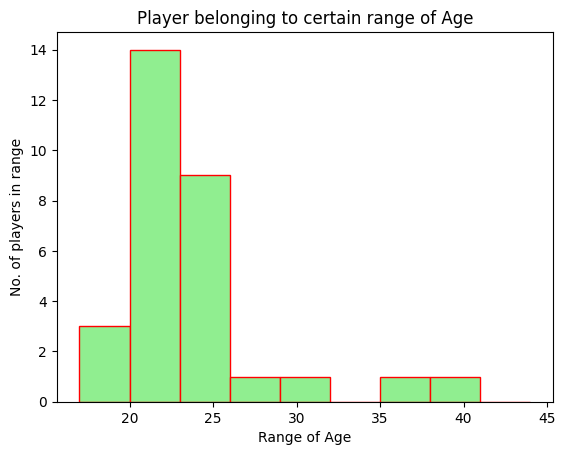

In [ ]:
from matplotlib import legend
bins = [17,20,23,26,29,32,35,38,41,44]
plt.hist(df.Age,edgecolor = "r",color = "lightgreen",bins = bins)
plt.xlabel("Range of Age")
plt.ylabel("No. of players in range")
plt.title("Player belonging to certain range of Age")
plt.show()

In [ ]:
df.head()

,Name,Nationality,Age,Team,Pot
0,Julio César Enciso,Paraguay,19,Brighton,83
1,Erling Haaland,Norway,22,Manchester City,94
2,Cristiano Ronaldo,Portugal,38,Al Nassr,88
3,Vinícius Jr.,Brazil,22,Real Madrid,92
4,Lionel Messi,Argentina,35,Paris SG,91


In [ ]:
df.Age.max()

38

In [ ]:
# Player with the maximum age
print(df[df['Age'] == df['Age'].max()])

                Name Nationality  Age      Team  Pot
2  Cristiano Ronaldo    Portugal   38  Al Nassr   88


In [ ]:
# Player with the minimum age
print(df[df['Age'] == df['Age'].min()])

                  Name Nationality  Age               Team  Pot
0   Julio César Enciso    Paraguay   19           Brighton   83
15     Jude Bellingham     England   19  Borussia Dortmund   91
19        Rayan Cherki      France   19                 OL   88


In [ ]:
# Grouping according to the Nationality
print(df.groupby(['Nationality','Name','Team']).sum().reset_index())


    Nationality                   Name               Team  Age  Pot
0     Argentina    Alexis Mac Allister           Brighton   24   83
1     Argentina         Enzo Fernández            Chelsea   22   88
2     Argentina         Julián Álvarez    Manchester City   23   86
3     Argentina       Lautaro Martínez              Inter   25   89
4     Argentina           Lionel Messi           Paris SG   35   91
5        Brazil              Neymar Jr           Paris SG   31   89
6        Brazil           Vinícius Jr.        Real Madrid   22   92
7       Croatia         Joško Gvardiol         RB Leipzig   21   89
8       England        Jude Bellingham  Borussia Dortmund   19   91
9       England            Mason Mount            Chelsea   24   86
10      England             Phil Foden    Manchester City   22   92
11       France      Eduardo Camavinga        Real Madrid   20   89
12       France          Kylian Mbappé           Paris SG   24   95
13       France      Randal Kolo Muani          

In [ ]:
# Player having the highest Pot
print(df[df['Pot'] == df['Pot'].max()])

            Name Nationality  Age      Team  Pot
8  Kylian Mbappé      France   24  Paris SG   95


In [ ]:
# Player belonging to Manchester City
print(df[df['Team'] == "Manchester City"])

              Name Nationality  Age             Team  Pot
1   Erling Haaland      Norway   22  Manchester City   94
5   Julián Álvarez   Argentina   23  Manchester City   86
24      Phil Foden     England   22  Manchester City   92


In [ ]:
# Average age of the players
df.Age.mean()

23.333333333333332

In [ ]:
# Player belonging to Argentina
print(df[df['Nationality'] == "Argentina"])

                   Name Nationality  Age             Team  Pot
4          Lionel Messi   Argentina   35         Paris SG   91
5        Julián Álvarez   Argentina   23  Manchester City   86
14  Alexis Mac Allister   Argentina   24         Brighton   83
21       Enzo Fernández   Argentina   22          Chelsea   88
27     Lautaro Martínez   Argentina   25            Inter   89


In [ ]:
# First 10 players having highest Pot value
print(df.sort_values(by='Pot',ascending=False).iloc[:10])

               Name Nationality  Age               Team  Pot
8     Kylian Mbappé      France   24           Paris SG   95
1    Erling Haaland      Norway   22    Manchester City   94
3      Vinícius Jr.      Brazil   22        Real Madrid   92
26    Jamal Musiala     Germany   20  FC Bayern München   92
24       Phil Foden     England   22    Manchester City   92
15  Jude Bellingham     England   19  Borussia Dortmund   91
4      Lionel Messi   Argentina   35           Paris SG   91
28   Victor Osimhen     Nigeria   24          Napoli FC   90
11        Neymar Jr      Brazil   31           Paris SG   89
25        Ansu Fati       Spain   20       FC Barcelona   89


In [ ]:
# Player having Age greater than 30 and Potential greater than 50
print(df[(df['Pot']>50) & (df['Age']>30)])

                 Name Nationality  Age      Team  Pot
2   Cristiano Ronaldo    Portugal   38  Al Nassr   88
4        Lionel Messi   Argentina   35  Paris SG   91
11          Neymar Jr      Brazil   31  Paris SG   89


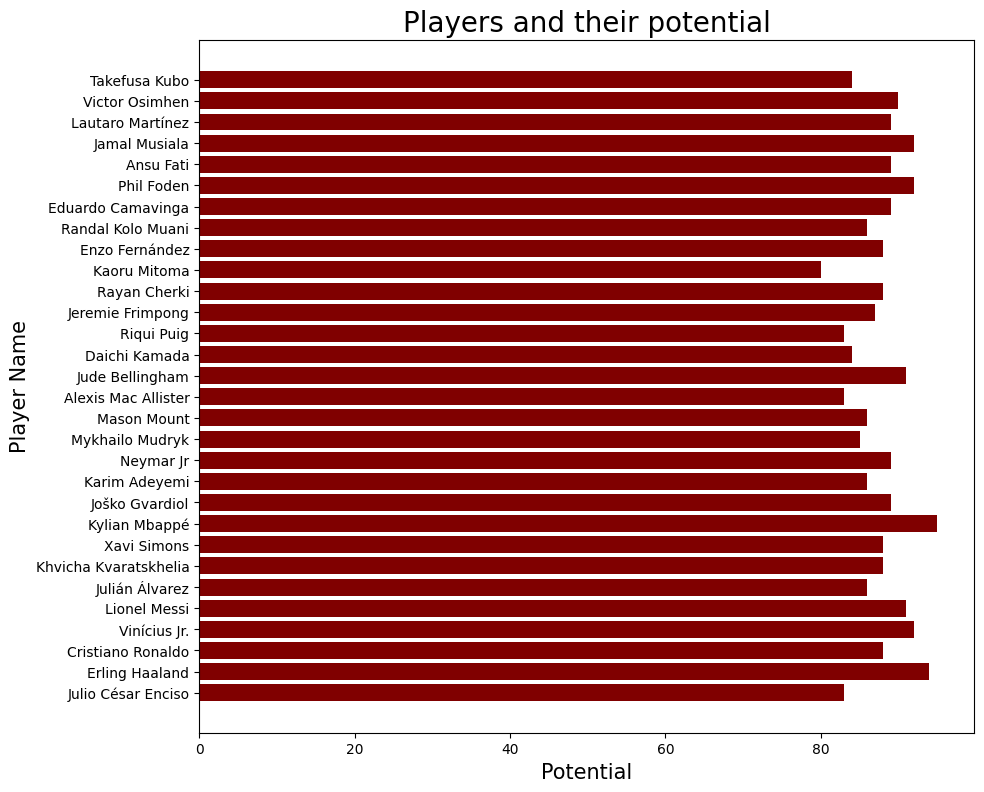

In [ ]:
fig = plt.figure(figsize=(10,9))
plt.barh(df.Name,df.Pot,color='maroon')
plt.xlabel("Potential",size=15)
plt.ylabel("Player Name",size=15)
plt.title("Players and their potential",size=20)
plt.show()